In [1]:
import sys
import ast
import math


def user_to_ip(user_string, group_size=5, starting=5):
    # Extract group and user information from the input string
    parts = user_string.split("_")
    group = int(parts[1])
    user = int(parts[3])

    # Calculate node_number using group and user information
    node_number = group * group_size + user + starting

    # Calculate isp based on node_number
    isp = node_number % 10

    node_number += isp

    # Construct the IP address
    ip_address = f"10.10.{isp}.{node_number}"

    return ip_address


In [2]:
f = open("code/dot_multi_vpn_scale1000_5_10_1_outputFeatures_('count',)_2023-12-15 11:11:12.932232.output", "r")
lines = [l for l in f]

In [3]:
line = lines[0]

In [4]:
def get_ncc(line):
    line = line.strip()
    user = line.split(',')[-2].split("\t")[-1][2:-1]
    
    data = line.split("\t")[-2]
    data_tuple = ast.literal_eval(data)
    
    #for results, user in data_tuple[6]:
    transformed_list = [
    t[0] * -1
    for results, _ in data_tuple[6]
    for t in results
]
    return user, transformed_list
    
def get_best_ncc(line):
    line = line.strip()
    user = line.split(',')[-2].split("\t")[-1][2:-1]
    
    data = line.split("\t")[-2]
    data_tuple = ast.literal_eval(data)
    
    #for results, user in data_tuple[6]:
    transformed_list = [
    results[0][0] * -1
    for results, _ in data_tuple[6]
]
    return user, transformed_list

In [10]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_it(df):
    df.sort_values(inplace=True)
    df_mean = np.mean(df)
    df_std = np.std(df)
    pdf = stats.norm.pdf(df, df_mean, df_std)
    
    plt.plot(df, pdf)

100
count_ISPAll
count    10000.000000
mean         0.233744
std          0.112464
min          0.031047
25%          0.163118
50%          0.220189
75%          0.285877
max          0.972269
dtype: float64
------------------------------------
94
count    100.000000
mean       0.823858
std        0.124246
min        0.321017
25%        0.787922
50%        0.848857
75%        0.904651
max        0.972269
dtype: float64
0
tcp.time_delta_ISPAll
count       0
unique      0
top       NaN
freq      NaN
dtype: object
------------------------------------
-
100
ip.proto_ISPAll
count    10000.000000
mean         0.233744
std          0.112464
min          0.031047
25%          0.163118
50%          0.220189
75%          0.285877
max          0.972269
dtype: float64
------------------------------------
94
count    100.000000
mean       0.823858
std        0.124246
min        0.321017
25%        0.787922
50%        0.848857
75%        0.904651
max        0.972269
dtype: float64
12
ip.len_ISP1
cou

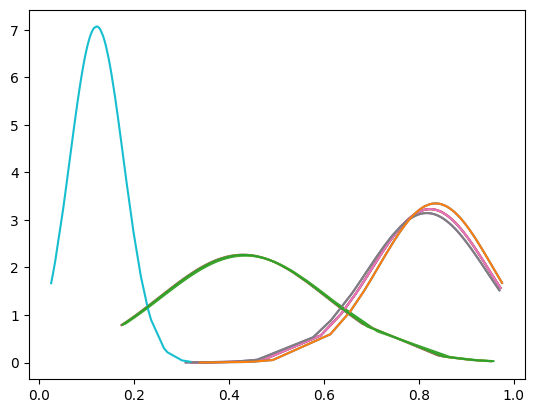

In [13]:
import pandas as pd

def above_t(s, t):
    return len(s[s > t])

for line in lines:
    try:
        print("=====================================")
        feature, nccs = get_ncc(line)
        s = pd.Series(nccs)
        print(above_t(s, 0.61))
        print(feature)
        print(s.describe())
        #plot_it(s)
        #s.plot(kind='hist', title="Hist")
        print("------------------------------------")
        _, best = get_best_ncc(line)
        s = pd.Series(best)
        print(above_t(s, 0.61))
        print(s.describe())
        plot_it(s)
        #s.plot(kind='hist', title="Hist")
    except:
        print("-")